![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Teste 2: Mais bisseção

Vamos continuar estudando o método de bisseção, agora com garantias de erros absolutos e relativos ao mesmo tempo.

## Questão 1: uma função auxiliar

Quando a bisseção retorna uma "raiz", ela dá o ponto médio de um intervalo $[a,b]$, onde temos certeza que há uma raiz de $f$.

Escreva uma função `absrel(a,b)` que, dado um intervalo $[a,b]$, retorna o maior erro absoluto e o maior erro relativo que pode ocorrer ao considerar que a raiz é o ponto médio deste intervalo.

In [122]:
import numpy as np
from numpy import infty

In [123]:
def absrel(a,b):
    absoluteError = (b-a)/2

    if a <= 0 and b >= 0:
        relativeError = +infty
    else:
        relativeError = abs(max(absoluteError/a, absoluteError/b))
    
    return absoluteError, relativeError

In [124]:
absrel(10,11)

(0.5, 0.05)

In [125]:
assert absrel(1,2) == (.5, .5)
assert absrel(10,11) == (0.5, 0.05)

In [126]:
assert absrel(-2,1) == (1.5, +infty)

Porquê o erro relativo do intervalo $[-2,1]$ é infinito?

YOUR ANSWER HERE

## Questão 2: Outros retornos na bisseção

Modifique o método da bisseção para terminar quando o erro absoluto **e** o erro relativo
forem menores do que (ou iguais às) tolerâncias dadas em argumento.

Retorne uma tripla contendo, nesta ordem:
- uma estimativa para a raiz $z$,
- uma estimativa para o erro absoluto $e_{abs}$,
- uma estimativa para o erro relativo $e_{rel}$.

In [127]:
def bissecao(f, a, b, abstol=1e-10, reltol=1e-10):
    m = (a + b) / 2

    while True:
        absoluteError, relativeError = absrel(a, b)

        if absoluteError <= abstol and relativeError <= reltol:
            return m, absoluteError, relativeError

        fm = f(m);
        if fm == 0:
            return m

        if f(a) * fm < 0:
            b = m
        else:
            a = m
        
        m = (a + b) / 2


Não se preocupe em obter valores iguais para as cotas superiores dos erros absoluto e relativo.

O importante é que estas estimativas sejam **coerentes** com os requisitos do método da bisseção:

- o erro absoluto real (ou seja, a diferença entre a raiz certa e a raiz calculada) deve ser menor do que a estimativa do erro absoluto,
- o erro relativo real deve ser menor do que a estimativa do erro relativo.

Note que é exatamente isso que vai ser testado em seguida!

In [128]:
bissecao(np.sin, 1,5)

(3.141592653642874, 5.820766091346741e-11, 1.8528073920420727e-11)

In [129]:
x,err,rel = bissecao(np.sin,1,5)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
assert abs(x - np.pi)/np.pi < rel
assert abs(x - np.pi) < err

In [130]:
# Testando que sai pela razão certa
assert rel < 1e-10
assert err < 1e-10

In [131]:
def f(x):
    return ((x**2 - 2)**2 - 2)**2 - 2 - x

In [132]:
x,err,rel = bissecao(f,1.4,1.6,reltol=1e-12)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
v = 1.532088886238
assert abs(x - v)/v < rel
assert abs(x - v) < err

In [133]:
# Testando que sai pela razão certa
assert err < 1e-10
assert rel < 1e-12

## Questão 3: extremidades da bisseção

Modifique a sua implementação da bisseção para retornar uma lista com os intervalos considerados,
em ordem decrescente.

In [134]:
def bissecao_extremidades(f,a,b, abstol=1e-10,reltol=1e-10):
    m = (a + b) / 2
    l = [(a,b)]

    while True:
        absoluteError, relativeError = absrel(a, b)

        if absoluteError <= abstol and relativeError <= reltol:
            return l

        fm = f(m);
        if fm == 0:
            return m

        if f(a) * fm < 0:
            b = m
        else:
            a = m
        
        l.append((a,b))

        m = (a + b) / 2

In [135]:
# Vendo alguns dos intervalos iniciais
l = bissecao_extremidades(np.sin,1,5)
for I in l[:5]:
    print(I)

(1, 5)
(3.0, 5)
(3.0, 4.0)
(3.0, 3.5)
(3.0, 3.25)


In [136]:
lista_intervalos = bissecao_extremidades(np.sin,100,103)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

lenList = len(lista_intervalos)

print(lenList)

assert abs(bf - af) <= 2e-10
assert 35 <= lenList <= 40

35


In [137]:
lista_intervalos = bissecao_extremidades(np.sin,100,103, abstol=1e-12, reltol=1e-12)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-12
assert abs(af - 32*np.pi) <= 2e-12
assert abs(bf - 32*np.pi) <= 2e-12
assert 40 <= len(lista_intervalos) <= 45

In [138]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

v = -0.4450418679126287
assert(abs(x - v)/v < 1e-12)
assert(abs(x - v) < 1e-8)

In [139]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

lenList = len(lista_intervalos)

print(lenList)

assert 40 <= lenList <= 45

41


## Questão 4: Gráficos

Faça o gráfico do tamanho dos intervalos, em função do número de iterações,
para a bisseção do cosseno entre 0 e 3, com as tolerâncias padrão.

In [140]:
import matplotlib.pyplot as plt

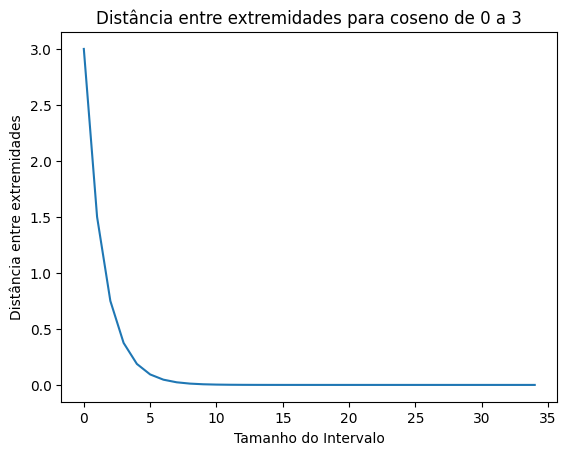

In [141]:
a, b = 0, 3

lista_intervalos = bissecao_extremidades(np.cos, a, b)

xs = np.arange(0, len(lista_intervalos))
ys = [i[1]-i[0] for i in lista_intervalos]

plt.plot(xs, ys)
plt.title('Distância entre extremidades para coseno de 0 a 3')
plt.xlabel('Tamanho do Intervalo')
plt.ylabel('Distância entre extremidades')

# Não apague a linha abaixo, ela faz os assert's dos gráficos darem certo
ax = plt.gca()

In [142]:
assert len(ax.lines) == 1
assert len(ax.get_title()) >= 10

In [143]:
linha = ax.lines[0]
assert 5e-11 < min(linha.get_ydata()) < 2e-10
assert max(linha.get_ydata()) == 3

Agora, faça um gráfico com
- o comprimento dos intervalos
- a distância entre a extremidade inferior e a raiz correta
- a distância entre a extremidade superior e a raiz correta

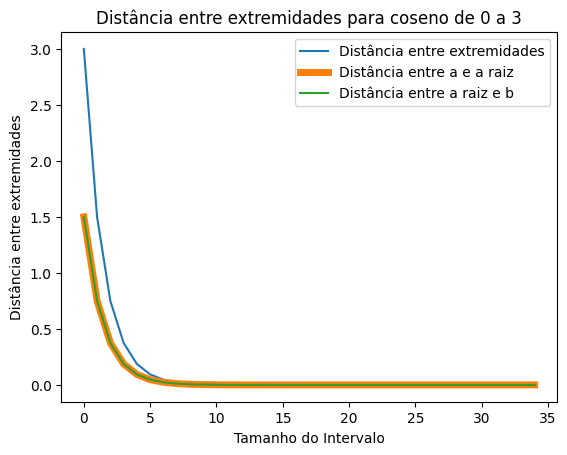

In [144]:
a, b = 0, 3

lista_intervalos = bissecao_extremidades(np.cos, a, b)

xs = np.arange(0, len(lista_intervalos))
ys = [i[1]-i[0] for i in lista_intervalos]

plt.plot(xs, ys, label='Distância entre extremidades')
plt.plot(xs, [(i[0] + i[1])/2-i[0] for i in lista_intervalos], label='Distância entre a e a raiz' , linewidth=5)
plt.plot(xs, [i[1] - (i[0] + i[1])/2 for i in lista_intervalos], label='Distância entre a raiz e b' )
plt.title('Distância entre extremidades para coseno de 0 a 3')
plt.xlabel('Tamanho do Intervalo')
plt.ylabel('Distância entre extremidades')
plt.legend()

ax = plt.gca()

In [145]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

Repita o gráfico acima para o polinômio $f$ acima, com tolerância `1e-13`, tanto absoluta como relativa.

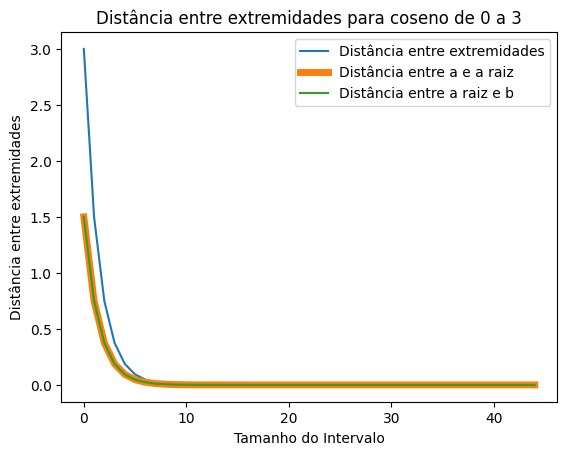

In [146]:
a, b = 0, 3

lista_intervalos = bissecao_extremidades(np.cos, a, b, abstol=1e-13, reltol=1e-13)

xs = np.arange(0, len(lista_intervalos))
ys = [i[1]-i[0] for i in lista_intervalos]

plt.plot(xs, ys, label='Distância entre extremidades')
plt.plot(xs, [(i[0] + i[1])/2-i[0] for i in lista_intervalos], label='Distância entre a e a raiz' , linewidth=5)
plt.plot(xs, [i[1] - (i[0] + i[1])/2 for i in lista_intervalos], label='Distância entre a raiz e b' )
plt.title('Distância entre extremidades para coseno de 0 a 3')
plt.xlabel('Tamanho do Intervalo')
plt.ylabel('Distância entre extremidades')
plt.legend()

ax = plt.gca()

In [147]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

In [148]:
for l in ax.lines:
    assert 40 <= len(l.get_xdata()) <= 45

O que você observa de comum nos gráficos com relação aos erros entre as extremidades dos intervalos?

É possível observar que a distância de a para a raiz correta e de b para a raiz correta é sempre a mesma, pois o algoritmo da bisseção busca sempre o ponto médio.